In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data_1 = pd.read_csv('./data/raw_data.csv')
data_2 = pd.read_csv('./data/raw_data2.csv')

In [3]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      70000 non-null  int64  
 1   PC1_SP          70000 non-null  float64
 2   PC2_SP          70000 non-null  float64
 3   FC_SP           70000 non-null  int64  
 4   TC_SP           70000 non-null  float64
 5   TC2_SP          70000 non-null  float64
 6   RR1_SP          70000 non-null  float64
 7   RR2_SP          70000 non-null  float64
 8   TCF             70000 non-null  float64
 9   PC1             70000 non-null  float64
 10  PC2             70000 non-null  float64
 11  TC1             70000 non-null  float64
 12  TC2             70000 non-null  float64
 13  Column1 D       70000 non-null  float64
 14  Column2 D       70000 non-null  float64
 15  Column1 reflux  70000 non-null  float64
 16  Column2 reflux  70000 non-null  float64
 17  Column1 B       70000 non-null 

In [4]:
# plot_data= data_1[:35000]
# # plot_var = ['PC1_SP', 'PC1', 'PC2_SP', 'PC2']
# plot_var = data_1.columns[1:]

# fig_num = len(plot_var)
# plt.figure(figsize=(20,3*fig_num))
# for i in range(fig_num):
#     var = plot_var[i]
#     plt.subplot(fig_num, 1, i+1)
#     plt.plot(plot_data[var])
#     plt.title(var)
# plt.tight_layout()

In [5]:
# plot_data= data_1[:3500]
# plot_var = ['TC_SP', 'TC1', 'TC2_SP', 'TC2', 'Column1 Qcond', 'Column1 Qreb']

# fig_num = len(plot_var)
# plt.figure(figsize=(20,3*fig_num))
# for i in range(fig_num):
#     var = plot_var[i]
#     plt.subplot(fig_num, 1, i+1)
#     plt.plot(plot_data[var])
#     plt.title(var)
# plt.tight_layout()

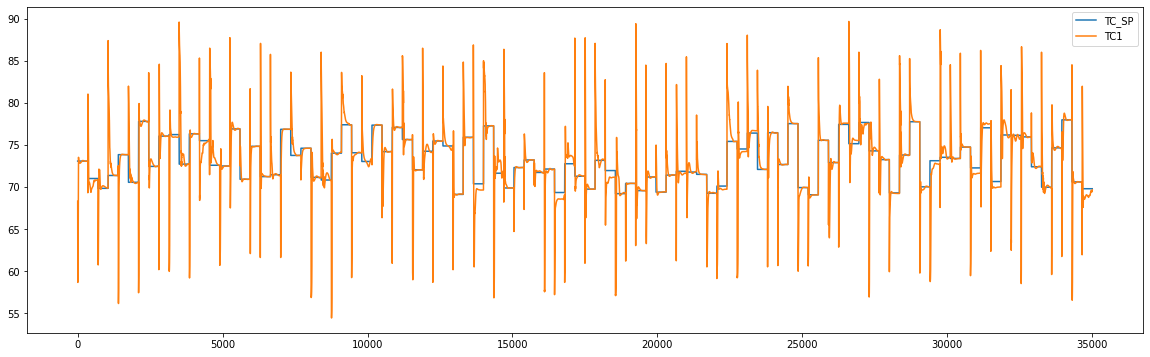

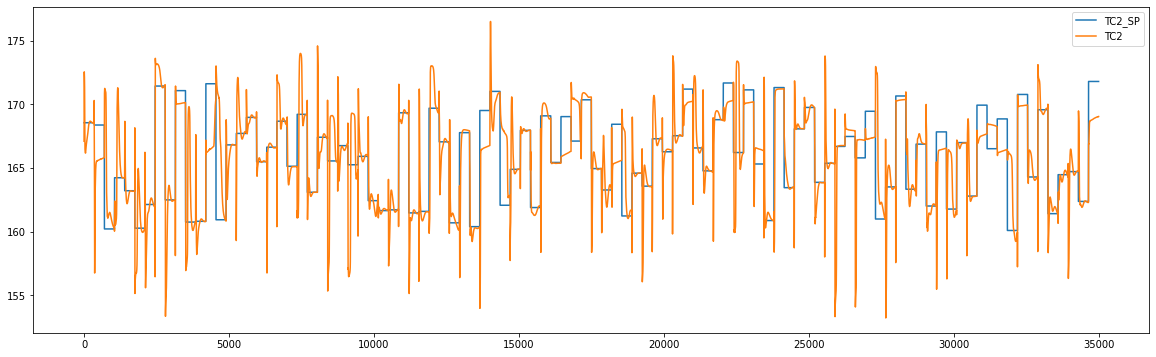

In [7]:
plot_data= data_1[:35000]
plot_var = ['TC_SP', 'TC1', 'TC2_SP', 'TC2', 'Column1 Qcond', 'Column1 Qreb']

plt.figure(figsize=(20,6))
var = 'TC_SP'
plt.plot(plot_data[var], label=var)
var = 'TC1'
plt.plot(plot_data[var], label=var)
plt.legend()
plt.show()

plt.figure(figsize=(20,6))
var = 'TC2_SP'
plt.plot(plot_data[var], label=var)
var = 'TC2'
plt.plot(plot_data[var], label=var)
plt.legend()
plt.show()

# model setting

In [17]:
data_1.columns

Index(['Unnamed: 0', 'PC1_SP', 'PC2_SP', 'FC_SP', 'TC_SP', 'TC2_SP', 'RR1_SP',
       'RR2_SP', 'TCF', 'PC1', 'PC2', 'TC1', 'TC2', 'Column1 D', 'Column2 D',
       'Column1 reflux', 'Column2 reflux', 'Column1 B', 'Column2 B',
       'Column1 Qcond', 'Column2 Qcond', 'Column1 Qreb', 'Column2 Qreb'],
      dtype='object')

In [ ]:
history_var = ['PC1_SP', 'PC2_SP', 'FC_SP', 'TC_SP', 'TC2_SP', 
               'RR1_SP', 'RR2_SP', 'TCF']
               
prediction_var = ['PC1', 'PC2', 'TC1', 'TC2', 'Column1 D', 'Column2 D',
                  'Column1 reflux', 'Column2 reflux', 'Column1 B', 'Column2 B',
                  'Column1 Qcond', 'Column2 Qcond', 'Column1 Qreb', 'Column2 Qreb']

## data2series

input sequence: 
history of states and set points (samples, history_size, input variables)

and
output sequence
를 만들어야해.

In [ ]:
def data2sequence(data, history_length, history_var, future_length, future_var,
                step=1, start_idx=0, end_idx=None):
    
    history_data = data[history_var].values
    future_data = data[future_var].values
   
    history_series = []
    future_series = []
    
    start_idx = start_idx + history_length
    if end_idx is None:
        end_idx = len(data) - future_length
    else:
        end_idx = end_idx - future_length
        
    for i in range(start_idx, end_idx):
        history_series.append(history_data[range(i-history_length, i, step)])
        if future_length == 1:
            future_series.append(future_data[i])
        else:
            future_series.append(future_data[i : i+future_length : step])
    
    return np.array(history_series), np.array(future_series)

In [9]:
def data2series(data, history_length, history_var, future_length, future_var,
                step=1, start_idx=0, end_idx=None):
    
    history_data = data[history_var].values
    future_data = data[future_var].values
   
    history_series = []
    future_series = []
    
    start_idx = start_idx + history_length
    if end_idx is None:
        end_idx = len(data) - future_length
    else:
        end_idx = end_idx - future_length
        
    for i in range(start_idx, end_idx):
        history_series.append(history_data[range(i-history_length, i, step)])
        if future_length == 1:
            future_series.append(future_data[i])
        else:
            future_series.append(future_data[i : i+future_length : step])
    
    return np.array(history_series), np.array(future_series)

In [ ]:
history_length = 350
prediction_length = 350
dataprocessing.data2series(data_1, )